# Previsão do Desempenho de Estudantes de Tecnologia em Provas Globais

In [ ]:
#Importando as bibliotecas necessárias

import pandas as pd #Para manipulação de Tabelas (DataFrames)
import matplotlib.pyplot as plt #Para criar gráficos básicos
import seaborn as sns #Para criar gráficos estatísticos mais avançados

*Pré-Processamento: Organização e transformação de variáveis.*

In [ ]:
#Leitura e carga dos dados: Carregando um arquivo .csv para dentro de um DataFrame do Pandas.

df = pd.read_csv('/content/student_habits_performance.csv')
print('Dados originais: ')
df.head()

Dados originais: 


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#Definindo o número de linhas e colunas (apenas para um entendimento geral)

linhas_colunas = df.shape
linhas = df.shape[0]  # número de linhas
colunas = df.shape[1] # número de colunas

print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 1000
Colunas: 16


In [ ]:
#Renomeando colunas do inglês para o português para facilitar a leitura e a interpretação do relatório final.

df.rename(columns={'student_id': 'Identificação do Estudante',
                   'age': 'Idade',
                   'gender': 'Gênero',
                   'study_hours_per_day': 'Horas de Estudo/Dia',
                   'social_media_hours': 'Horas de Rede Social/Dia',
                   'netflix_hours': 'Horas de Netflix/Dia',
                   'part_time_job': 'Emprego de Meio Período',
                   'attendance_percentage': 'Porcentagem de Presença',
                   'sleep_hours': 'Horas de Sono/Dia',
                   'diet_quality': 'Qualidade da Dieta',
                   'exercise_frequency': 'Frequência de Atividade Física',
                   'parental_education_level': 'Nível de Educação dos Pais',
                   'internet_quality': 'Qualidade da Internet',
                   'mental_health_rating': 'Saúde Mental (Classificação)',
                   'extracurricular_participation': 'Participação Extracurricular',
                   'exam_score': 'Pontuação do Exame'



                   }, inplace=True) #inplace=True modifica o dataframe 'df' original, sem precisar criar um novo.
df.head()

,Identificação do Estudante,Idade,Gênero,Horas de Estudo/Dia,Horas de Rede Social/Dia,Horas de Netflix/Dia,Emprego de Meio Período,Porcentagem de Presença,Horas de Sono/Dia,Qualidade da Dieta,Frequência de Atividade Física,Nível de Educação dos Pais,Qualidade da Internet,Saúde Mental (Classificação),Participação Extracurricular,Pontuação do Exame
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
#Substituções dos valores de texto (strings) dentro das células do inglês para o português, garantindo a consistencia no relatório.

substituicoes = {
    'Yes': 'Sim',
    'No': 'Não',
    'Good': 'Boa',
    'Fair': 'Razoável',
    'Poor': 'Ruim',
    'Male': 'Masculino',
    'Female': 'Feminino',
    'High School': 'Ensino Médio',
    'Bachelor': 'Graduação',
    'Master': 'Mestrado',
    'Average': 'Razoável',



}
df = df.replace(substituicoes)

print('DataFrame com Dados traduzidos: ')
df.head()

DataFrame com Dados traduzidos: 


,Identificação do Estudante,Idade,Gênero,Horas de Estudo/Dia,Horas de Rede Social/Dia,Horas de Netflix/Dia,Emprego de Meio Período,Porcentagem de Presença,Horas de Sono/Dia,Qualidade da Dieta,Frequência de Atividade Física,Nível de Educação dos Pais,Qualidade da Internet,Saúde Mental (Classificação),Participação Extracurricular,Pontuação do Exame
0,S1000,23,Feminino,0.0,1.2,1.1,Não,85.0,8.0,Razoável,6,Mestrado,Razoável,8,Sim,56.2
1,S1001,20,Feminino,6.9,2.8,2.3,Não,97.3,4.6,Boa,6,Ensino Médio,Razoável,8,Não,100.0
2,S1002,21,Masculino,1.4,3.1,1.3,Não,94.8,8.0,Ruim,1,Ensino Médio,Ruim,1,Não,34.3
3,S1003,23,Feminino,1.0,3.9,1.0,Não,71.0,9.2,Ruim,4,Mestrado,Boa,1,Sim,26.8
4,S1004,19,Feminino,5.0,4.4,0.5,Não,90.9,4.9,Razoável,3,Mestrado,Boa,1,Não,66.4


In [ ]:
#Aqui, organizamos nossas variáveis em lista, o que facilita a automação de códigos futuros.

#atributos numéricos(quantitativos): representam quantidades contínuas ou discretas.
atributos_numericos = ['Idade', 'Horas de Estudo/Dia', 'Horas de Rede Social/Dia', 'Horas de Netflix/Dia', 'Porcentagem de Presença', 'Horas de Sono/Dia']

#atributos categóricos (qualitativos ou classificatórios): representam as ordinais e nominais
atributos_categoricos = ['Gênero', 'Emprego de Meio Período', 'Qualidade da Dieta', 'Frequência de Atividade Física', 'Nível de Educação dos Pais', 'Qualidade da Internet', 'Saúde Mental (Classificação)', 'Participação Extracurricular']

#variáveis categóricas binárias
atributos_binarios = ['Emprego de Meio Período', 'Participação Extracurricular']

#variáveis categóricas ordinais
atributos_ordinais = ['Qualidade da Dieta', 'Nível de Educação dos Pais', 'Qualidade da Internet', 'Frequência de Atividade Física', 'Saúde Mental (Classificação)']

#variáveis categóricas nominais
atributos_nominais = ['Gênero']

#variável-alvo: a que desejamos analisar.
variavel_desempenho = ['Pontuação do Exame']





*Pré-Processamento: Limpeza*

In [ ]:
#Primeiro verificamos quais colunas têm dados faltantes e quantos.
print('Valores faltantes (NaN) por coluna antes da limpeza: ')
print(df.isnull().sum())
print("-" * 40) # Apenas um separador visual

Valores faltantes (NaN) por coluna antes da limpeza: 
Identificação do Estudante         0
Idade                              0
Gênero                             0
Horas de Estudo/Dia                0
Horas de Rede Social/Dia           0
Horas de Netflix/Dia               0
Emprego de Meio Período            0
Porcentagem de Presença            0
Horas de Sono/Dia                  0
Qualidade da Dieta                 0
Frequência de Atividade Física     0
Nível de Educação dos Pais        91
Qualidade da Internet              0
Saúde Mental (Classificação)       0
Participação Extracurricular       0
Pontuação do Exame                 0
dtype: int64
----------------------------------------


In [ ]:
#A coluna 'Nível de Educação dos Pais' tem 91 valores ausentes, então, decidimos remover apenas as linhas onde esta coluna específica é nula, pois ela é importante para nossas
#análises futuras.
# Usar df.dropna() (sem subset) removeria mais linhas e nos faria perder dados.
#Criamos um novo dataframe 'df_limpo' (sem usar 'inplace=True') para preservar o dataframe 'df' original para qualquer consulta.

df_limpo = df.dropna(subset=['Nível de Educação dos Pais'])

In [ ]:
# Verificando quantos dados sobraram.
linhas_originais = df.shape[0]
linhas_finais = df_limpo.shape[0]
linhas_removidas = linhas_originais - linhas_finais
print("--- Relatório da Limpeza de NaNs ---")
print(f"Linhas originais no DataFrame: {linhas_originais}")
print(f"Linhas removidas (linhas com NaN em 'Nível de Educação dos Pais'): {linhas_removidas}")
print(f"Linhas finais no DataFrame (df_limpo): {linhas_finais}")


--- Relatório da Limpeza de NaNs ---
Linhas originais no DataFrame: 1000
Linhas removidas (linhas com NaN em 'Nível de Educação dos Pais'): 91
Linhas finais no DataFrame (df_limpo): 909


*Manipulação dos dados do Dataframe: Medidas de Tendência Central, Medidas de Dispersão e Separatrizes*

In [ ]:
#O método describe permite a visualização completa das medidas de tendência central, dispersão e separatrizes das colunas numéricas.
#Aqui, utilizamos o DataFrame limpo anteriormente.
estatisticas_descritivas = df_limpo.describe()
print(estatisticas_descritivas)

            Idade  Horas de Estudo/Dia  Horas de Rede Social/Dia  \
count  909.000000           909.000000                909.000000   
mean    20.475248             3.538724                  2.504620   
std      2.302721             1.469730                  1.164802   
min     17.000000             0.000000                  0.000000   
25%     18.000000             2.500000                  1.700000   
50%     20.000000             3.500000                  2.500000   
75%     22.000000             4.500000                  3.300000   
max     24.000000             8.300000                  7.200000   

       Horas de Netflix/Dia  Porcentagem de Presença  Horas de Sono/Dia  \
count            909.000000               909.000000         909.000000   
mean               1.830363                83.880308           6.474037   
std                1.071251                 9.453622           1.218943   
min                0.000000                56.000000           3.200000   
25%         

In [ ]:
#Baseado nos quartis Q1 e Q3, segmentamos o grupo de alunos com maiores notas (alto desempenho) e o grupo de menores notas (baixo desempenho)

#O valor dos quartis Q1 e Q3 já estava exposto nas tabelas acima, no entanto, para uma melhor exatidão das casas decimais, utilizamos o Pandas para calcular de forma separada
q1_notas = df_limpo['Pontuação do Exame'].quantile(0.25)
q3_notas = df_limpo['Pontuação do Exame'].quantile(0.75)
print(f"\nValor de corte Q1 (25%): {q1_notas:.2f}")
print(f"Valor de corte Q3 (75%): {q3_notas:.2f}\n")

grupo_baixo_desempenho = df_limpo[df_limpo['Pontuação do Exame'] <= q1_notas]
grupo_alto_desempenho = df_limpo[df_limpo['Pontuação do Exame'] >= q3_notas]


print("----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Numéricas* -----")
print(grupo_baixo_desempenho[['Horas de Estudo/Dia', 'Horas de Rede Social/Dia', 'Horas de Netflix/Dia', 'Porcentagem de Presença']].describe())



print("\n----- HÁBITOS DO GRUPO DE ALTO DESEMPENHO (Q3) *Variáveis Numéricas* -----")
print(grupo_alto_desempenho[['Horas de Estudo/Dia', 'Horas de Rede Social/Dia', 'Horas de Netflix/Dia', 'Porcentagem de Presença' ]].describe())


Valor de corte Q1 (25%): 58.40
Valor de corte Q3 (75%): 81.30

----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Numéricas* -----
       Horas de Estudo/Dia  Horas de Rede Social/Dia  Horas de Netflix/Dia  \
count           229.000000                229.000000            229.000000   
mean              1.938865                  2.720524              2.074236   
std               0.958581                  1.192545              1.106952   
min               0.000000                  0.000000              0.000000   
25%               1.300000                  2.000000              1.300000   
50%               2.000000                  2.900000              2.000000   
75%               2.600000                  3.500000              2.900000   
max               4.300000                  7.200000              5.300000   

       Porcentagem de Presença  
count               229.000000  
mean                 83.185590  
std                   9.115098  
min                  59.7

In [ ]:
#Segmentação por variáveis categóricas
print("----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Categóricas* -----")

print(grupo_baixo_desempenho['Qualidade da Dieta'].value_counts(normalize=True))
print(grupo_baixo_desempenho['Nível de Educação dos Pais'].value_counts(normalize=True))
print(grupo_baixo_desempenho['Emprego de Meio Período'].value_counts(normalize=True))
print(grupo_baixo_desempenho['Frequência de Atividade Física'].value_counts(normalize=True))
print(grupo_baixo_desempenho['Saúde Mental (Classificação)'].value_counts(normalize=True))
print(grupo_baixo_desempenho['Participação Extracurricular'].value_counts(normalize=True))

print("\n" + "="*50 + "\n")

print("----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Categóricas* -----")
print(grupo_alto_desempenho['Qualidade da Dieta'].value_counts(normalize=True))
print(grupo_alto_desempenho['Nível de Educação dos Pais'].value_counts(normalize=True))
print(grupo_alto_desempenho['Emprego de Meio Período'].value_counts(normalize=True))
print(grupo_alto_desempenho['Frequência de Atividade Física'].value_counts(normalize=True))
print(grupo_alto_desempenho['Saúde Mental (Classificação)'].value_counts(normalize=True))
print(grupo_alto_desempenho['Participação Extracurricular'].value_counts(normalize=True))

# normalize=True: (COMENTÁRIO ADICIONADO)
# Usamos 'normalize=True' para ver os resultados em PORCENTAGEM (proporção).
# Isto é muito melhor do que a contagem bruta, pois permite uma
# comparação justa entre os grupos (que têm tamanhos ligeiramente diferentes).

----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Categóricas* -----
Qualidade da Dieta
Razoável    0.432314
Boa         0.375546
Ruim        0.192140
Name: proportion, dtype: float64
Nível de Educação dos Pais
Ensino Médio    0.441048
Graduação       0.375546
Mestrado        0.183406
Name: proportion, dtype: float64
Emprego de Meio Período
Não    0.777293
Sim    0.222707
Name: proportion, dtype: float64
Frequência de Atividade Física
1    0.209607
0    0.179039
3    0.170306
5    0.131004
4    0.122271
6    0.117904
2    0.069869
Name: proportion, dtype: float64
Saúde Mental (Classificação)
1     0.152838
4     0.139738
3     0.135371
2     0.131004
5     0.122271
6     0.091703
8     0.078603
10    0.061135
7     0.056769
9     0.030568
Name: proportion, dtype: float64
Participação Extracurricular
Não    0.676856
Sim    0.323144
Name: proportion, dtype: float64


----- HÁBITOS DO GRUPO DE BAIXO DESEMPENHO (Q1) *Variáveis Categóricas* -----
Qualidade da Dieta
Razoável    0.45

*Criação de um novo DataFrame para análise da Correlação entre as Variáveis*

CORRELAÇÃO DE PEARSON (HEATMAP): A segmentação (Q1 vs Q3) foi uma análise de "extremos". Agora, vamos calcular a correlação de *todos* os 909 alunos para confirmar ou refutar as nossas descobertas.

In [ ]:
df_para_correlacao = df_limpo.copy() #Criamos uma cópia para não alterar 'df_limpo' que ainda poderá ser requisitado.
df_para_correlacao.drop(columns=['Identificação do Estudante'], inplace=True) #Remove-se a coluna ID do estudante, pois não possui valor  estatístico e por ser texto causa erro no cálculo.

print('DataFrame preparado para análise de Correlação')
df_para_correlacao.head()

DataFrame preparado para análise de Correlação


,Idade,Gênero,Horas de Estudo/Dia,Horas de Rede Social/Dia,Horas de Netflix/Dia,Emprego de Meio Período,Porcentagem de Presença,Horas de Sono/Dia,Qualidade da Dieta,Frequência de Atividade Física,Nível de Educação dos Pais,Qualidade da Internet,Saúde Mental (Classificação),Participação Extracurricular,Pontuação do Exame
0,23,Feminino,0.0,1.2,1.1,Não,85.0,8.0,Razoável,6,Mestrado,Razoável,8,Sim,56.2
1,20,Feminino,6.9,2.8,2.3,Não,97.3,4.6,Boa,6,Ensino Médio,Razoável,8,Não,100.0
2,21,Masculino,1.4,3.1,1.3,Não,94.8,8.0,Ruim,1,Ensino Médio,Ruim,1,Não,34.3
3,23,Feminino,1.0,3.9,1.0,Não,71.0,9.2,Ruim,4,Mestrado,Boa,1,Sim,26.8
4,19,Feminino,5.0,4.4,0.5,Não,90.9,4.9,Razoável,3,Mestrado,Boa,1,Não,66.4


In [ ]:
# O cálculo de correlação funciona apenas com números, precisamos de converter todas as colunas de texto para numéricas.

colunas_texto = ['Gênero', 'Emprego de Meio Período', 'Qualidade da Dieta', 'Nível de Educação dos Pais', 'Qualidade da Internet','Participação Extracurricular']

# Limpando os espaços em branco, esse é passo essencial para limpeza. Sem ele, o .replace() falha ao não encontrar correspondência exata.
for coluna in colunas_texto:
    df_para_correlacao[coluna] = df_para_correlacao[coluna].str.strip()

# Definindo o mapa de substituição (Dicionário)
# Usamos mapeamento numérico que preserva a ordem para as variáveis ordinais.
mapa_texto_para_numero = {
    'Ruim': 1,
    'Razoável': 2,
    'Boa': 3,
    'Ensino Médio': 1,
    'Graduação': 2,
    'Mestrado': 3,
    'Não': 0,
    'Sim': 1,
    'Masculino': 0,
    'Feminino': 1,
    'Other': 2
}

# Aplicando a substituição
df_para_correlacao = df_para_correlacao.replace(mapa_texto_para_numero)

print("DataFrame 100% numérico pronto para correlação:")
df_para_correlacao.head()

DataFrame 100% numérico pronto para correlação:


/tmp/ipython-input-2438326170.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_para_correlacao = df_para_correlacao.replace(mapa_texto_para_numero)


,Idade,Gênero,Horas de Estudo/Dia,Horas de Rede Social/Dia,Horas de Netflix/Dia,Emprego de Meio Período,Porcentagem de Presença,Horas de Sono/Dia,Qualidade da Dieta,Frequência de Atividade Física,Nível de Educação dos Pais,Qualidade da Internet,Saúde Mental (Classificação),Participação Extracurricular,Pontuação do Exame
0,23,1,0.0,1.2,1.1,0,85.0,8.0,2,6,3,2,8,1,56.2
1,20,1,6.9,2.8,2.3,0,97.3,4.6,3,6,1,2,8,0,100.0
2,21,0,1.4,3.1,1.3,0,94.8,8.0,1,1,1,1,1,0,34.3
3,23,1,1.0,3.9,1.0,0,71.0,9.2,1,4,3,3,1,1,26.8
4,19,1,5.0,4.4,0.5,0,90.9,4.9,2,3,3,3,1,0,66.4


In [ ]:
# Calculando a Correlação
matriz_corr = df_para_correlacao.corr()
print(matriz_corr)


                                   Idade    Gênero  Horas de Estudo/Dia  \
Idade                           1.000000 -0.015904             0.007150   
Gênero                         -0.015904  1.000000             0.045959   
Horas de Estudo/Dia             0.007150  0.045959             1.000000   
Horas de Rede Social/Dia       -0.023854  0.017320             0.007364   
Horas de Netflix/Dia            0.005841  0.012175            -0.014493   
Emprego de Meio Período        -0.014120 -0.032269            -0.022745   
Porcentagem de Presença        -0.030203  0.020133             0.028967   
Horas de Sono/Dia               0.040498  0.043186            -0.026241   
Qualidade da Dieta             -0.014531 -0.012115             0.031628   
Frequência de Atividade Física -0.005718 -0.057864            -0.024708   
Nível de Educação dos Pais      0.027578 -0.002589             0.001925   
Qualidade da Internet           0.004607  0.063269             0.013504   
Saúde Mental (Classificaç

*Criando gráficos para facilitar visualização*

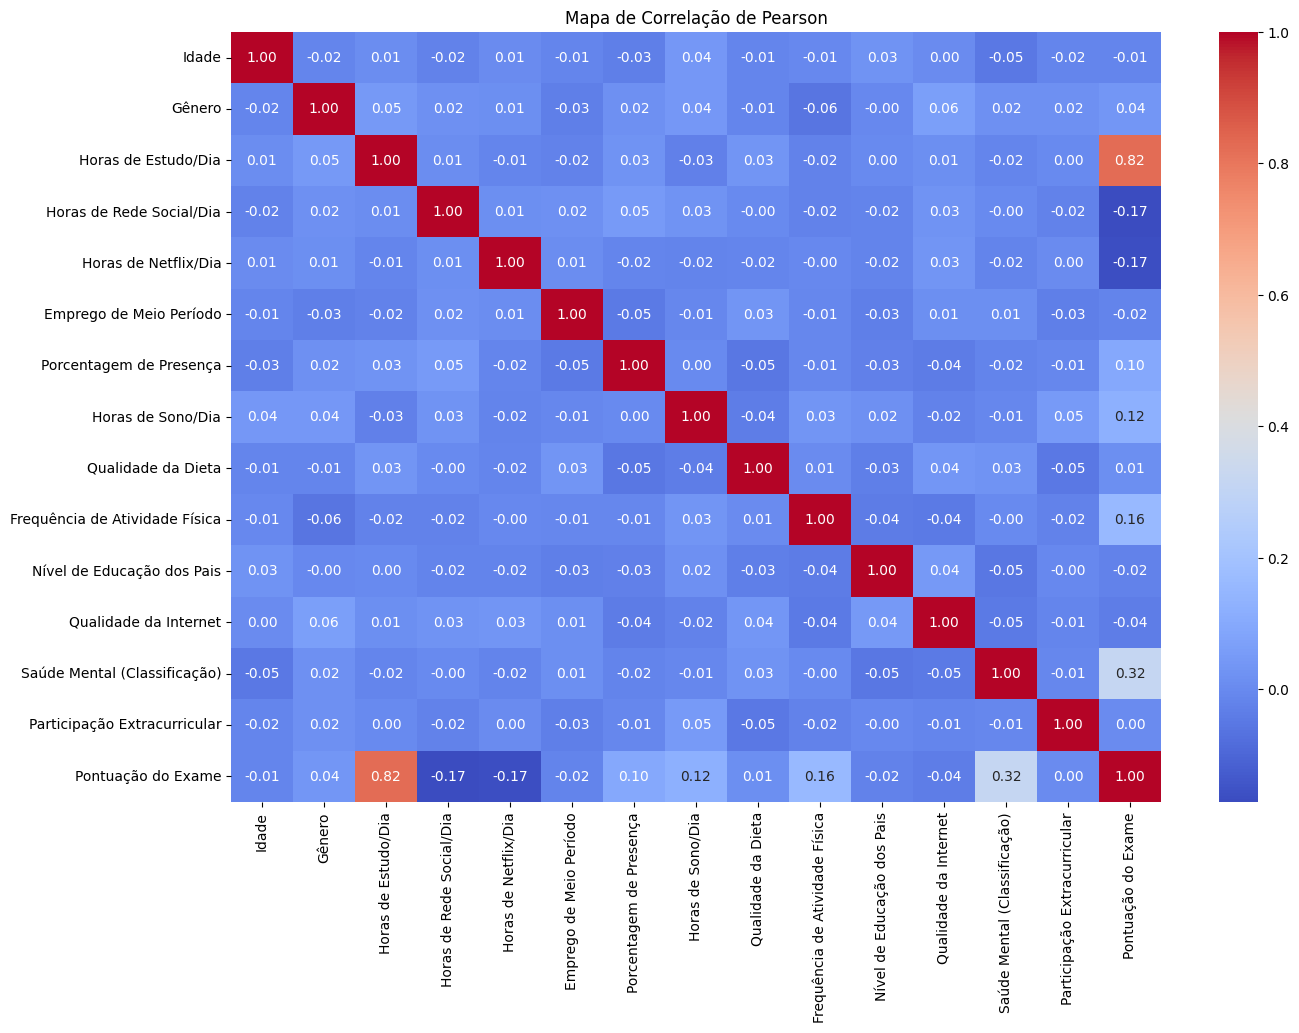

In [ ]:
#O print da matriz acima é difícil de ler. Um heatmap usa cores para nos ajudar a identificar padrões rapidamente.

plt.figure(figsize=(15, 10)) # Tamanho maior para melhor leitura
sns.heatmap(
    matriz_corr,
    annot=True,     # Mostra os números (coeficientes) dentro de cada célula
    cmap='coolwarm',# Esquema de cores (vermelho=positivo, azul=negativo)
    fmt=".2f"       # Formata os números para 2 casas decimais
)
plt.title('Mapa de Correlação de Pearson')
plt.show()

In [ ]:
#Cálculo das medidas para a plotagem dos gráficos (já foram feitos antes), mas para estabelecer uma melhor organização repetimos.
x = df_limpo['Pontuação do Exame']

media = x.mean()
moda_lista = x.mode() # mode() sempre retorna uma lista (pode haver empate)
moda = moda_lista[0]  # Pegamos a primeira moda para plotar


q1 = x.quantile(0.25) # Valor de Q1 (25%) já calculado antriormente
q2 = x.median()       # .median() é o mesmo que .quantile(0.50)
q3 = x.quantile(0.75) # Valor de Q3 (75%) já calculado anteriormente

print(f'Média: {media:.2f}')
print(f'Moda (primeira): {moda:.2f}')
print(f'Q1 (25%): {q1:.2f}')
print(f'Q2 (Mediana/50%): {q2:.2f}')
print(f'Q3 (75%): {q3:.2f}')


Média: 69.56
Moda (primeira): 100.00
Q1 (25%): 58.40
Q2 (Mediana/50%): 70.40
Q3 (75%): 81.30


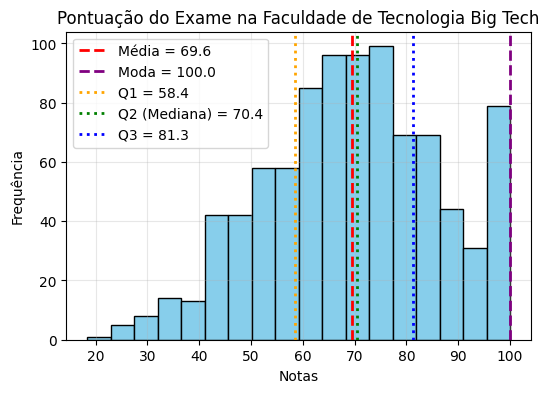

In [ ]:
# 3) Criar o histograma
plt.figure(figsize=(6,4))
# Cria uma nova figura (gráfico) com tamanho de 8 unidades de largura e 5 de altura. y tem que ser 2/3 de x.

plt.hist(x, bins='fd', color='skyblue', edgecolor='black')
# Gera o histograma dos dados em 'x' usando a regra de Freedman–Diaconis ('fd') para definir o número de intervalos (bins),
# com as barras em azul-claro e bordas pretas.

plt.title("Pontuação do Exame na Faculdade de Tecnologia Big Tech")
# Define o título do gráfico.

plt.xlabel("Notas")
# Define o rótulo (nome) do eixo X.

plt.ylabel("Frequência")
# Define o rótulo (nome) do eixo Y.

plt.grid(alpha=0.3)
# Ativa a grade de fundo no gráfico com transparência de 30%. Ela ajuda a ler.

# 4) Inserir linhas verticais das medidas
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média = {media:.1f}")
plt.axvline(moda, color='purple', linestyle='--', linewidth=2, label=f"Moda = {moda:.1f}")
plt.axvline(q1, color='orange', linestyle=':', linewidth=2, label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color='green', linestyle=':', linewidth=2, label=f"Q2 (Mediana) = {q2:.1f}")
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f"Q3 = {q3:.1f}")

# Adicionar legenda para identificar as linhas
plt.legend()
plt.show()

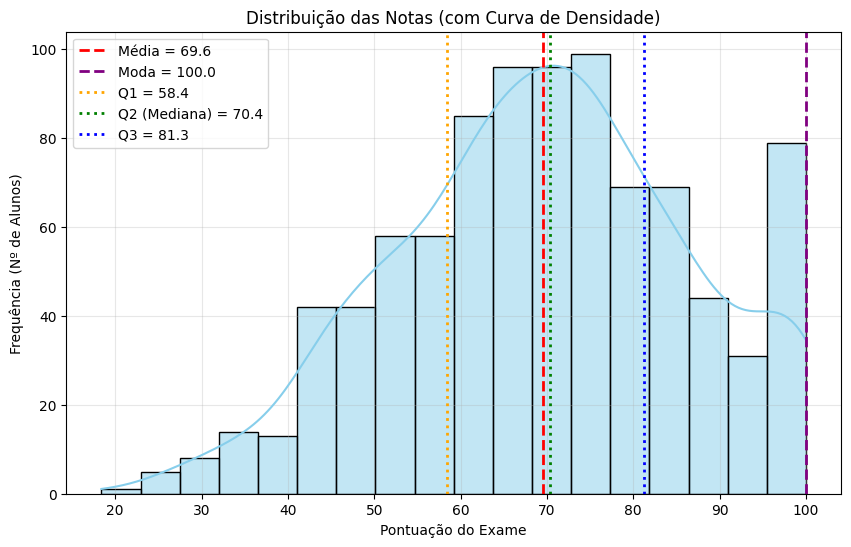

In [ ]:


# PLOTAGEM COM SEABORN (com curva)
plt.figure(figsize=(10, 6))

#Isso desenha a "curva normal" ou curva de tendência
sns.histplot(data=df_limpo, x='Pontuação do Exame', bins='fd', color='skyblue', kde=True)

plt.title("Distribuição das Notas (com Curva de Densidade)")
plt.xlabel("Pontuação do Exame")
plt.ylabel("Frequência (Nº de Alunos)")

plt.grid(alpha=0.3)

# 4) Inserir linhas verticais (idêntico)
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média = {media:.1f}")
plt.axvline(moda, color='purple', linestyle='--', linewidth=2, label=f"Moda = {moda:.1f}")
plt.axvline(q1, color='orange', linestyle=':', linewidth=2, label=f"Q1 = {q1:.1f}")
plt.axvline(q2, color='green', linestyle=':', linewidth=2, label=f"Q2 (Mediana) = {q2:.1f}")
plt.axvline(q3, color='blue', linestyle=':', linewidth=2, label=f"Q3 = {q3:.1f}")

plt.legend()
plt.show()